In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate

%matplotlib inline

In [2]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=10e-7, reg=0, epochs=120000, show_fig=False):
        X, Y = shuffle(X, Y)
        
        #Split X and Y into training and validation sets
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0
        
        costs = []
        best_validation_error = 1
        
        #loop through the number of epochs
        for i in range(epochs):
            pY = self.forward(X)
            
            #gradient descent step with regularization
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
            self.b -= learning_rate*((pY - Y).sum() + reg*self.b)
            
            if i % 20 == 0:
                pYvalid = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print ("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

In [3]:
X, Y = getBinaryData()

In [4]:
# Now we balance the classes
X0 = X[Y==0, :]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))

i: 0 cost: 696.902030278 error: 0.52
i: 20 cost: 683.735998193 error: 0.448
i: 40 cost: 674.024954354 error: 0.427
i: 60 cost: 666.629244559 error: 0.412
i: 80 cost: 660.742113986 error: 0.395
i: 100 cost: 655.892696725 error: 0.385
i: 120 cost: 651.790600802 error: 0.382
i: 140 cost: 648.247606239 error: 0.38
i: 160 cost: 645.136088477 error: 0.384
i: 180 cost: 642.365993278 error: 0.372
i: 200 cost: 639.871574797 error: 0.369
i: 220 cost: 637.603452113 error: 0.359
i: 240 cost: 635.523661501 error: 0.355
i: 260 cost: 633.602455079 error: 0.355
i: 280 cost: 631.816154091 error: 0.355
i: 300 cost: 630.145662151 error: 0.351
i: 320 cost: 628.575405969 error: 0.348
i: 340 cost: 627.092562122 error: 0.341
i: 360 cost: 625.686480941 error: 0.343
i: 380 cost: 624.34824981 error: 0.341
i: 400 cost: 623.070357319 error: 0.337
i: 420 cost: 621.84643177 error: 0.338
i: 440 cost: 620.671035419 error: 0.34
i: 460 cost: 619.539501072 error: 0.338
i: 480 cost: 618.447801256 error: 0.339
i: 500 cost

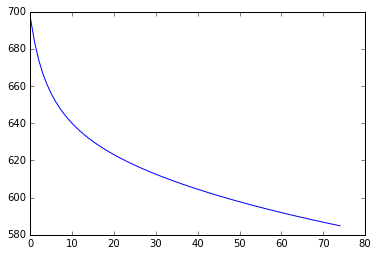

0.70149858242203322

In [8]:
# Now create a model
model = LogisticModel()
model.fit(X, Y, show_fig=True, learning_rate=10e-7, epochs=1500)
model.score(X, Y)

In [ ]:
model.score(X, Y)